In [1]:
import staircase as sc
from imports import *


C:\Python38\lib\site-packages\cupy\_environment.py:207: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Python38\\lib\\site-packages\\cupy\\.data\\_wheel.json' mode='r' encoding='cp1252'>
  _preload_config = json.load(open(config_path))
..\hotstepper\Steps.py:134: DeprecationWarning: invalid escape sequence \l
  """


In [2]:
df = pd.read_csv(r"../data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = Steps.read_dataframe(df,'enter','leave')

df.shape

(1229, 3)

<AxesSubplot:>

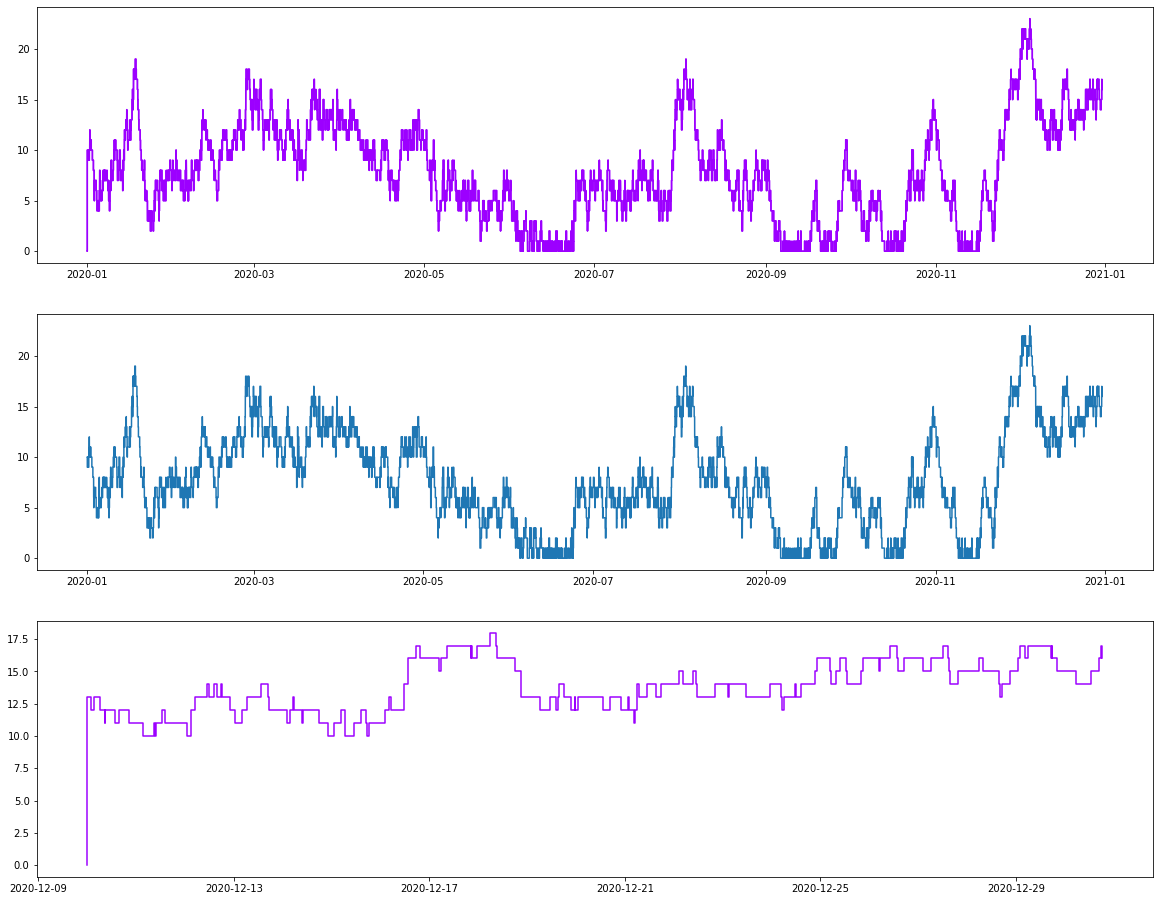

In [3]:
#p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=3,figsize=(20,16))

#vsteps.rebase(tbase)
vs_clip = vsteps.clip(lbound= pd.Timestamp(2020,12,10))

vsteps.plot(ax=ax[0])
vsteps.plot(ax=ax[0])

queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
queue.plot(ax[1])


(vs_clip).plot(ax=ax[2])
#vs_clip.smooth_plot(ax=ax[2],color='g')
#print(queue.integrate())
#print(vsteps.integrate())


<AxesSubplot:xlabel='x'>

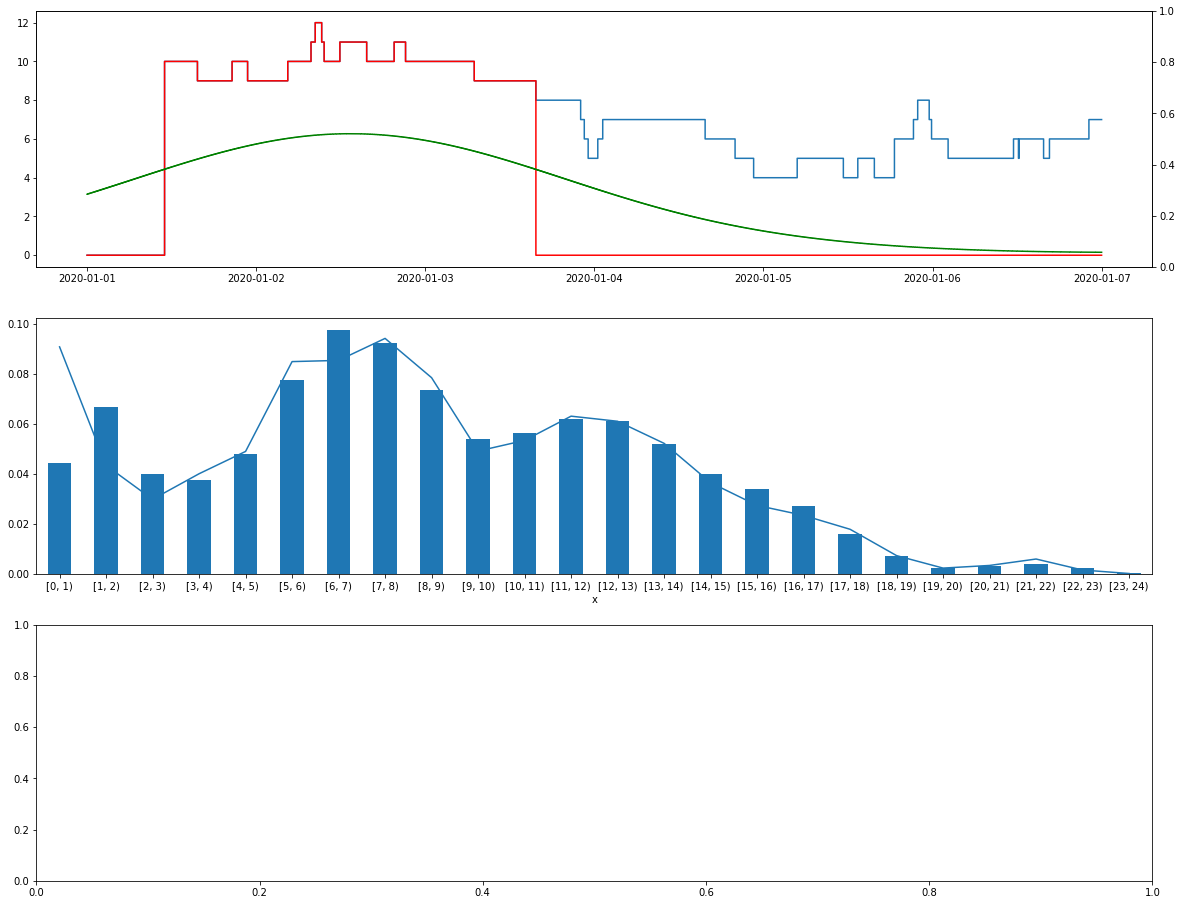

In [4]:
p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,1,7), pd.Timedelta(minutes=1)).astype(pd.Timestamp)

fig,ax = plt.subplots(nrows=3,figsize=(20,16))
#vsteps.rebase()
fstep = vsteps.step(p)
ax[0].step(p,fstep,where='post')


low_steps = (vsteps > 8)
ax0 = ax[0].twinx()
ax[0].step(p,low_steps(p),color='r',where='post')
ax[0].step(p,low_steps.smooth_step(p),color='g')

vsteps.histogram_plot(ax=ax[1],kind='bar')

queue.hist().plot(ax=ax[1])


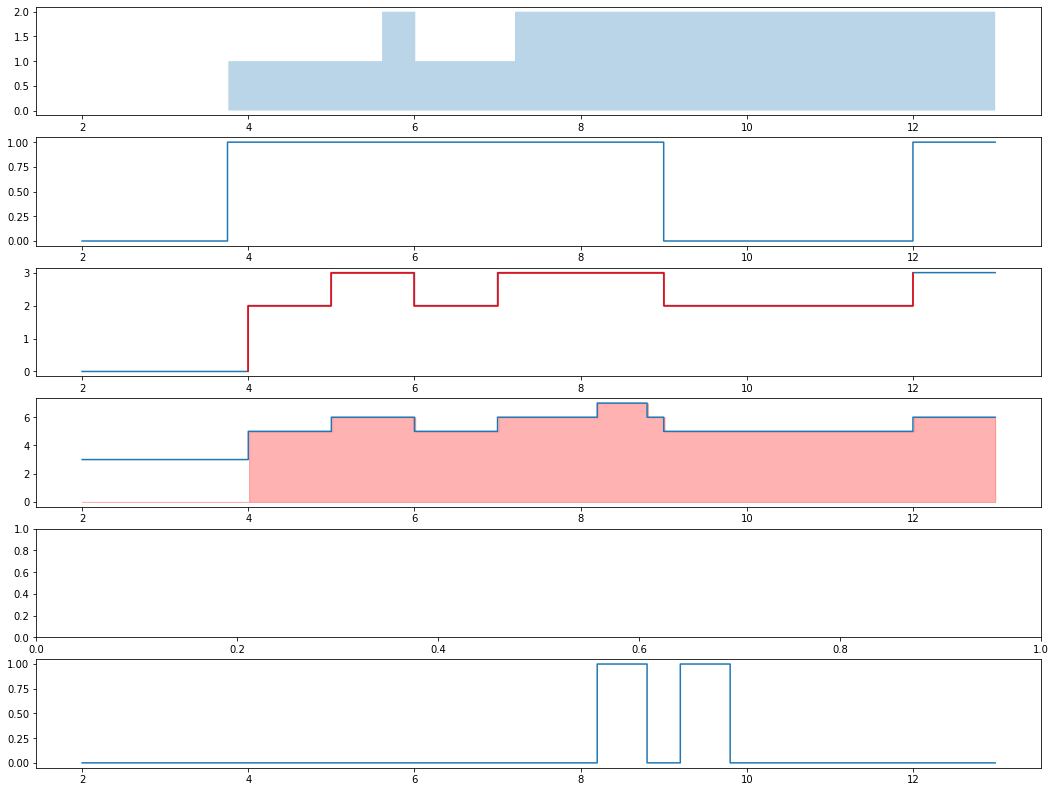

In [2]:

#mbase = np.frompyfunc(mybase2,1,1)
tbase = Basis(Basis.sigmoid,5)


x = Step(3.75)
y = Step(5.6,6)
y2 = Step(8.2,8.8)
y3 = Step(9.2,9.8)

#y3.rebase()
z = Step(7.2)
q = Step(12)

p = Step(9,weight=-1)
p1 = Step(9.5,weight=-1)

ss1 = Steps()
ss1 = ss1.add([z,x,y])

ss2 = Steps()
ss2 = ss2.add([q,x,p])

s1 = sc.Stairs()
s1.layer(4)
s1.layer(5,6)
s1.layer(4)
s1.layer(7)
s1.layer(12)
s1.layer(9,value=-1)

ss3 = Steps().add([Step(4),Step(4),Step(5,6),Step(7),Step(12),Step(9,weight=-1)])

#ss3 = ss2 + ss1
ss4 = ss3+y2 + 3

ss5 = Steps().add([y2,y3])

#print(list(ss3._cummulative.values()))
#print(list(ss3._cummulative.keys()))
yy = y3+y3-y2
#ss4.rebase(tbase)
    
p = np.arange(2,13,0.01)

fig,ax = plt.subplots(nrows=6,figsize=(18,14))

ax[0].fill_between(p,ss1.step(p),step='post',alpha=0.3)
ax[1].step(p,ss2.step(p))
ax[2].step(p,ss3.step(p))
s1.plot(ax[2],color='r')
ax[3].step(p,ss4.step(p))
ax[3].fill_between(p,(ss4 > 4).step(p),color='r',step='post',alpha=0.3)
ax[5].step(p,ss5.step(p))
#ax[5].step(p,yy.step(p))



In [5]:
fig, ax = plt.subplots(figsize=(16,8))

ax.step(p,ss1.step(p),label = "s1")
ax.step(p,ss2.step(p),label = "s2", linestyle="--", linewidth=3)
ax.step(p,ss3.step(p),label = "s3", linestyle="-", linewidth=2)
ax.legend()


NameError: name 'p' is not defined

In [4]:
#[2, 3, 1, 2, 1, 2]
#[3.75, 5.6, 6, 7.2, 9, 12]

s1 = sc.Stairs()
s1.layer(4)
s1.layer(4)
s1.layer(5,6)
s1.layer(7)
s1.layer(12)
s1.layer(9,value=-1)

ss3 = Steps().add([Step(4),Step(4),Step(5,6),Step(7),Step(12),Step(9,weight=-1)])

s = Step(4,weight=2)
tbase = Basis(Basis.logit,1)
#ss3.rebase(tbase)
print(ss3.integrate())

print(s1.integrate())

19.0
19


In [8]:
queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
print(queue.percentile(35))
print(vsteps.percentile(35))

6.0
6.0


In [10]:

for s in ss3:
    print(s.weight())

1
1
1
-1
1
-1
1
